In [74]:
import osmnx as ox

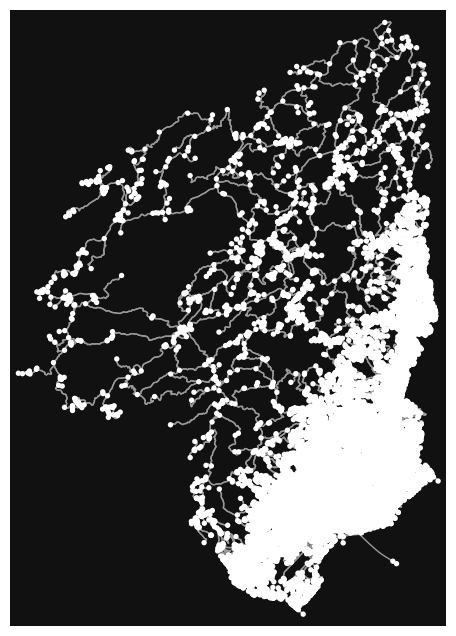

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [75]:
croad1 = ox.graph_from_place("Cebu City, Philippines")
ox.plot_graph(croad1)

In [76]:
ox.save_graph_geopackage(croad1, filepath="croad1.gpkg")

C:\Users\User\Documents\Anaconda\Lib\site-packages\pyogrio\geopandas.py:275: UserWarning: More than one layer found in 'croad1.gpkg': 'nodes' (default), 'edges'. Specify layer parameter to avoid this warning.
  result = read_func(


<Axes: >

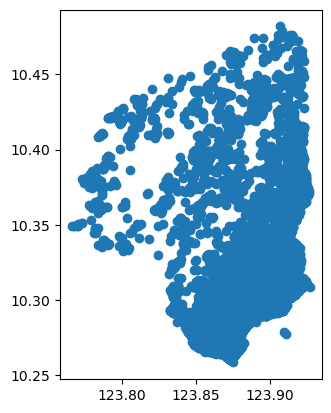

In [77]:
import geopandas as gpd
polygon = gpd.read_file(r"C:\Users\User\OJT UP Diliman\croad1.gpkg")
polygon.plot()

<Axes: >

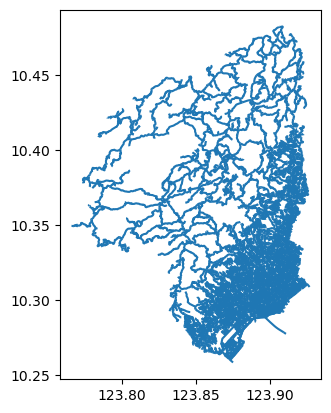

In [99]:
edges = gpd.read_file("croad1.gpkg", layer='edges')
edges.plot()

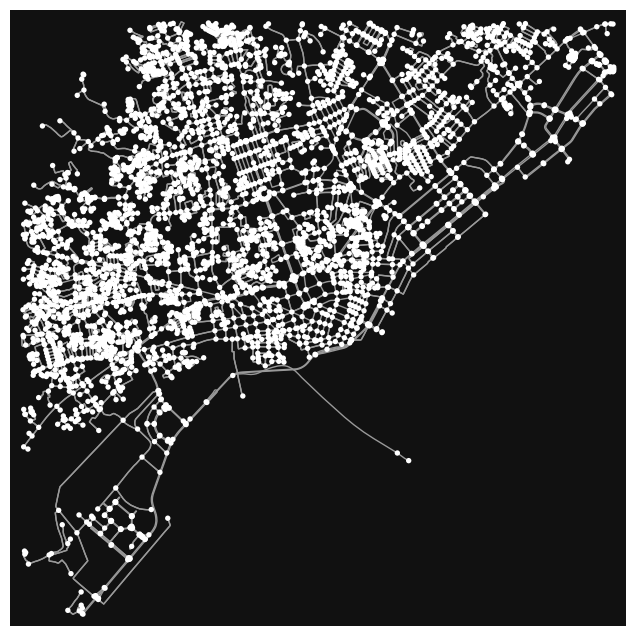

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [79]:
road2 = ox.graph_from_point((10.29461322385231, 123.89984820570731), dist = 4000, network_type = "drive" )
ox.plot_graph(road2)

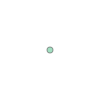

In [81]:
study_area = polygon["geometry"].iloc[0]
study_area

In [82]:
from shapely.geometry import Polygon, MultiPolygon
print(type(study_area))

<class 'shapely.geometry.point.Point'>


In [83]:
gdf = ox.geocode_to_gdf("Cebu City, Philippines")
polygon = gdf.loc[0, 'geometry']

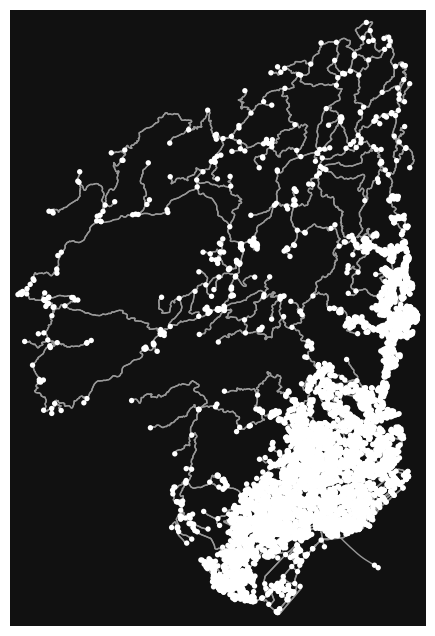

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [84]:
road3 = ox.graph_from_polygon(polygon, network_type="drive")
ox.plot_graph(road3)

In [85]:
gdf_nodes, gdf_edges = ox.convert.graph_to_gdfs(G)
gdf_nodes.head()

,y,x,highway,street_count,geometry
osmid,,,,,
281418213,10.297314,123.896007,traffic_signals,4,POINT (123.89601 10.29731)
281418215,10.298942,123.895586,NaN,4,POINT (123.89559 10.29894)
281446240,10.298880,123.899949,traffic_signals,4,POINT (123.89995 10.29888)
281446251,10.293651,123.897797,traffic_signals,3,POINT (123.8978 10.29365)
281446253,10.293229,123.897899,NaN,3,POINT (123.8979 10.29323)


In [86]:
G_proj = ox.projection.project_graph(G)
nodes_proj = ox.convert.graph_to_gdfs(G_proj, edges=False)
graph_area_m = nodes_proj.union_all().convex_hull.area
graph_area_m

1503321.3610380753

In [87]:
ox.stats.basic_stats(G_proj, area =graph_area_m, clean_int_tol=15)

{'n': 198,
 'm': 457,
 'k_avg': 4.616161616161616,
 'edge_length_total': 41303.14511997846,
 'edge_length_avg': 90.37887334787409,
 'streets_per_node_avg': 3.2777777777777777,
 'streets_per_node_counts': {0: 0, 1: 10, 2: 2, 3: 114, 4: 68, 5: 3, 6: 1},
 'streets_per_node_proportions': {0: 0.0,
  1: 0.050505050505050504,
  2: 0.010101010101010102,
  3: 0.5757575757575758,
  4: 0.3434343434343434,
  5: 0.015151515151515152,
  6: 0.005050505050505051},
 'intersection_count': 188,
 'street_length_total': 29441.508836253746,
 'street_segment_count': 309,
 'street_length_avg': 95.27996387137135,
 'circuity_avg': 1.0197079575712626,
 'self_loop_proportion': 0.0,
 'clean_intersection_count': 138,
 'node_density_km': 131.70836597657123,
 'intersection_density_km': 125.05642830098682,
 'edge_density_km': 27474.594714371487,
 'street_density_km': 19584.308185392747,
 'clean_intersection_density_km': 91.79673992306479}

In [88]:
G = ox.routing.add_edge_speeds(G)
G = ox.routing.add_edge_travel_times(G)

In [89]:
orig = ox.distance.nearest_nodes(G, X= 123.89984820570731, Y= 10.29461322385231)
dest = ox.distance.nearest_nodes(G, X= 123.879347544587, Y=10.315692489381902)

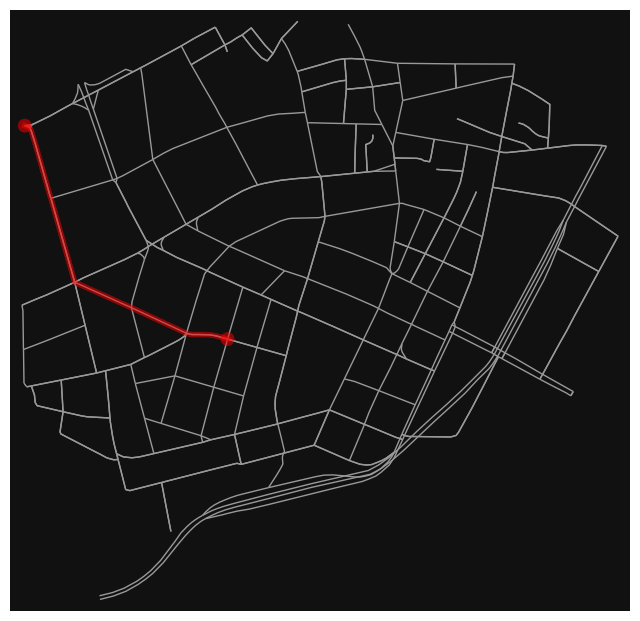

In [90]:
route = ox.routing.shortest_path(G, orig, dest, weight="travel_time")
fig, ax = ox.plot.plot_graph_route(G, route, node_size=0)

In [91]:
edge_lengths = ox.routing.route_to_gdf(G, route)["length"]
round(sum(edge_lengths))

812

In [92]:
orig_x = G.nodes[orig]["x"]
orig_y = G.nodes[orig]["y"]
dest_x = G.nodes[dest]["x"]
dest_y = G.nodes[dest]["y"]
round(ox.distance.great_circle(orig_y, orig_x, dest_y, dest_x))

722

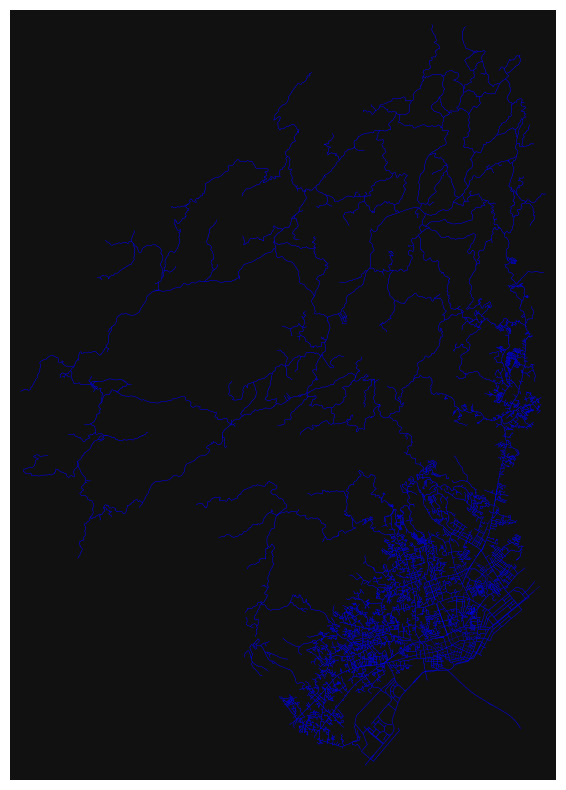

In [93]:
place = {"city": "Cebu City", "country": "Philippines"}
G = ox.graph.graph_from_place(place, network_type = "drive", truncate_by_edge = True)
fig, ax = ox.plot.plot_graph(G, figsize = (10,10), node_size= 0, edge_color= "b", edge_linewidth = 0.2)

In [94]:
place = "Cebu City, Philippines"
tags = {"building": True}
gdf = ox.features.features_from_place(place, tags)
gdf.shape

(26708, 258)

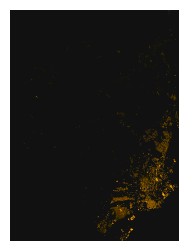

In [95]:
fig, ax = ox.plot.plot_footprints(gdf, figsize=(3, 3))

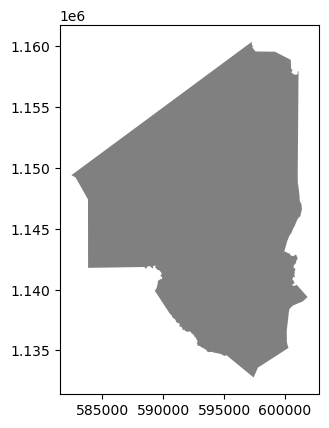

In [96]:
city = ox.geocoder.geocode_to_gdf("Cebu City, Philippines")
city_proj = ox.projection.project_gdf(city)
ax = city_proj.plot(fc="gray", ec="none")
_ = ax.axis()

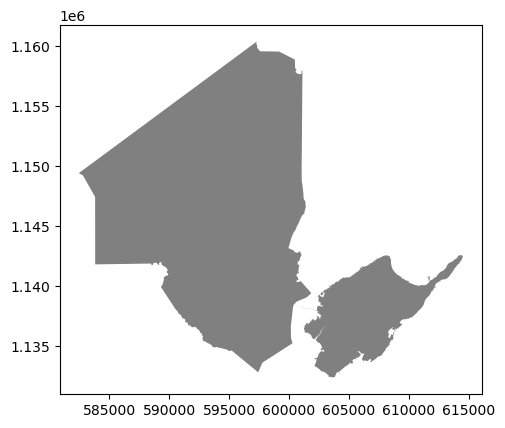

In [97]:
place_names = ["Cebu City, Philippines",
               "Mactan, Philippines",
              ]
east_bay = ox.geocoder.geocode_to_gdf(place_names)
east_bay = ox.projection.project_gdf(east_bay)
ax = east_bay.plot(fc="gray")
_ = ax.axis()

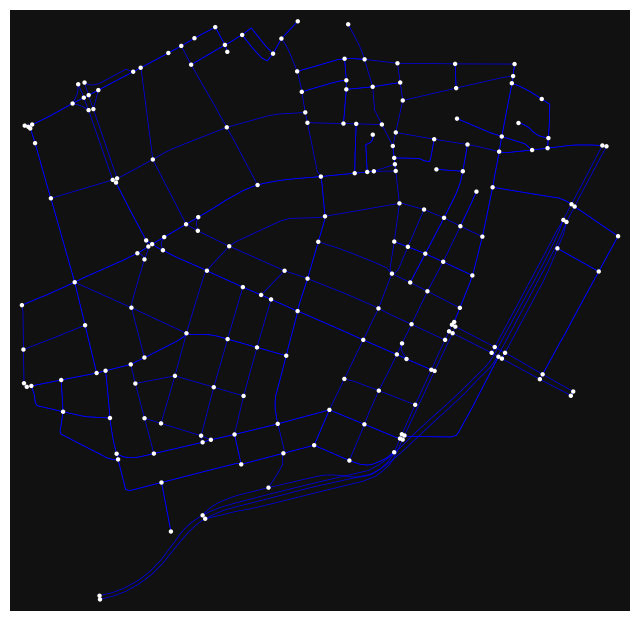

In [98]:
location_point = (10.294530557290244,123.90203270238362)
G = ox.graph.graph_from_point(location_point, dist = 750, dist_type="bbox", network_type="drive")
fig, ax = ox.plot.plot_graph(G, node_size=10, edge_color="b", edge_linewidth=0.5)

In [100]:
G